# Augmentations of EEG-signals

In [1]:
import torch
import numpy as np
from datasets.augmentations import *
from datasets.SHHS_dataset_timeonly import SHHS_dataset_1
import matplotlib.pyplot as plt
import os
print(os.getcwd())

C:\Users\tomsm\PycharmProjects\thesis\datasets


In [2]:
# A function for plotting
def plot_augmentation(x, x_aug):
    plt.rcParams['figure.figsize'] = [10, 5]
    plt.plot(x.squeeze(), linewidth=1.0, label="Original eeg-signal")
    plt.plot(x_aug.squeeze(), linewidth=1.0, label="Augmented eeg-signal")
    plt.legend(loc="upper left")

## DC-shift

In [3]:
ds = SHHS_dataset_1('../../thesis01/data/', 1, 2)
x = ds.__getitem__(1)[0]
x_prev = ds.__getitem__(0)[0]
p = 0
dc = DCShift(mini=1,
             maxi=5,
             prob=p,
             batch_size=1)
x_dc = dc(x, x_prev)

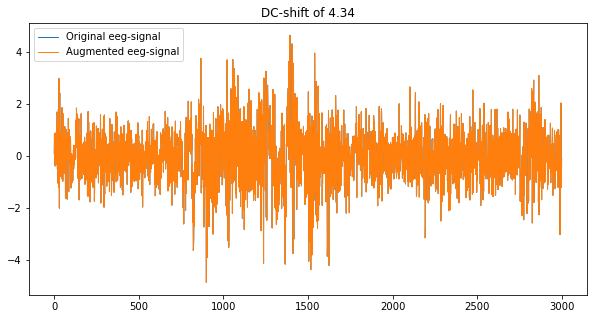

In [4]:
plot_augmentation(x, x_dc)
plt.title(f"DC-shift of {dc.u.item():.2f}")
plt.show()

## Amplitude scale

Text(0.5, 1.0, 'Amplitude shift of 0.69')

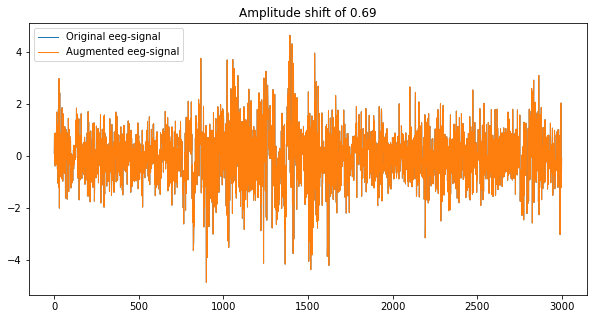

In [5]:
am = AmplitudeScale(mini=0.5,
                    maxi=0.75,
                    prob=p,
                    batch_size=1)
x_am = am(x, x_prev)
plot_augmentation(x, x_am)
plt.title(f"Amplitude shift of {am.u.item():.2f}")

## Time shift

Text(0.5, 1.0, 'Time shift of 255')

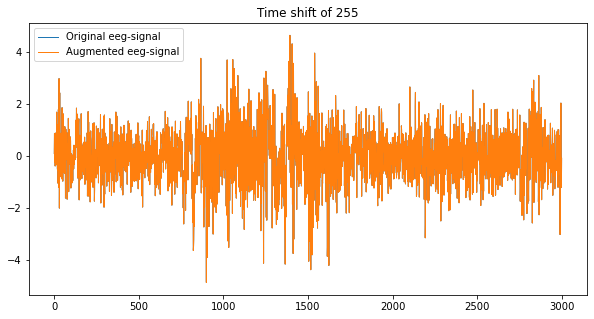

In [6]:
ts = TimeShift(mini=200,
               maxi=400,
               prob=p,
               batch_size=1)
x_ts = ts(x, x_prev)
plot_augmentation(x, x_ts)
plt.title(f"Time shift of {int(ts.u.item())}")

In [7]:
print(x_ts.squeeze()[1])
print(x_prev.squeeze()[-220])

tensor(0.8741)
tensor(0.9840)


## Zero Mask

Text(0.5, 1.0, 'Zero mask of 553')

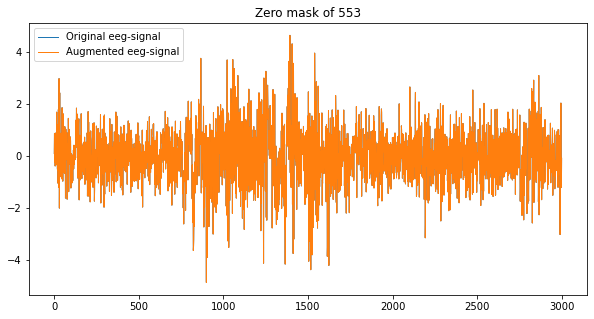

In [8]:
zm = ZeroMask(mini=400,
              maxi=600,
              prob=p,
              batch_size=1)
x_zm = zm(x, x_prev)
plot_augmentation(x, x_zm)
plt.title(f"Zero mask of {int(zm.u.item())}")

## Gaussian noise

Text(0.5, 1.0, 'Additive gaussian noise of stdev: 0.57')

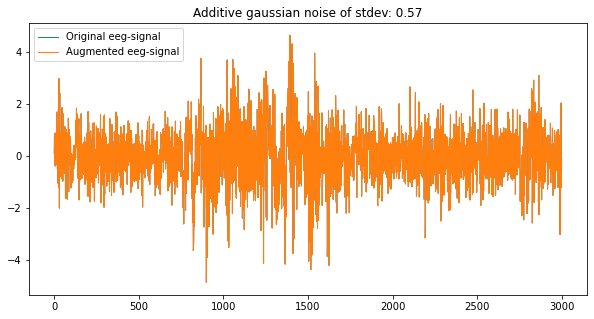

In [9]:
gn = GaussianNoise(mini=0.4,
                   maxi=0.6,
                   prob=p,
                   batch_size=1)
x_gn = gn(x, x_prev)
plot_augmentation(x, x_gn)
plt.title(f"Additive gaussian noise of stdev: {gn.u.item():.2f}")

## Band stop filter: TODO

## Composition of multiple transforms

Text(0.5, 1.0, 'Two different augmentations of the same signal')

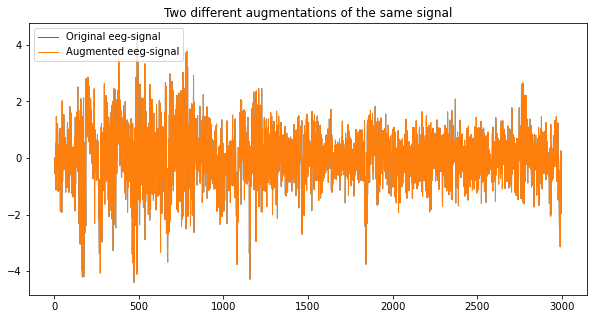

In [10]:
contrast_transforms = ContrastiveTransformations(
    [
        am,
        gn,
        zm,
        ts
    ], n_views=2
)
ds_augmented = SHHS_dataset_1('../../thesis01/data/', 1, 2, transform=contrast_transforms)
x_aug = ds_augmented.__getitem__(0)[0]
plot_augmentation(*x_aug)
plt.title("Two different augmentations of the same signal")

In [11]:
from SHHS_dataset_timeonly import EEGdataModule
dm = EEGdataModule(DATA_PATH='../../thesis01/data/',
                   batch_size=8,
                   data_split=[3, 1],
                   num_patients_train=2,
                   num_patients_test=1,
                   num_workers=0,
                   transform=contrast_transforms)
dm.setup()

In [12]:
train_dataloader = dm.train_dataloader()

In [13]:
batch = next(iter(train_dataloader))
inputs, _ = batch
inputs = torch.cat(inputs, dim=0)


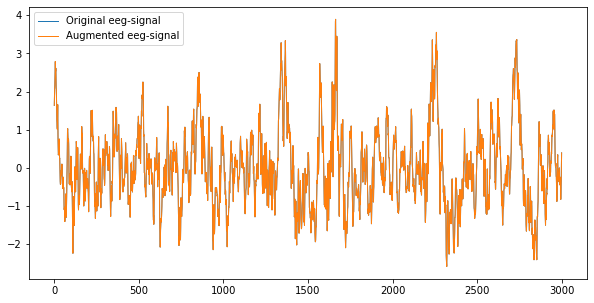

In [14]:
plot_augmentation(inputs[0], inputs[8])